# House Cloud
 
This work presents an app construction that is rating DJ artists of electronic music events in SF according to their number of followers on SoundCloud, then presents top venues where DJs with the highest rating are performing for all found period, then filters venues for the current and next months. The work flow includes next steps:

* Collect the data from published venue of electronic music events in the Bay Area.
* Clean the date by parsing out columns with performing artists, hosting clubs and the events dates, times.
* Retrieve the date about artist's number of followers and published tracks from SoundCloud.com using collected list of artists from the published venue; merge with the venue data and sort in a descending order (all collected data is also exported to "output/current_venue_sorted_2.csv").
* Export to pgAdmin database.
* Build and app.py reading the pgAdmin database and presenting results on html pages where found artists are sorted in the descending order, according to their number of followers, and includes information about the hosting event/club, date and time. The app contains three available routes: all found venue; venue found for this month, and venue found for next month.

**** Due to COVID-19 published venue was significantly shorter than expected...


In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import datetime as dt
from splinter import Browser
import pandas as pd


In [2]:
# URL of page to be scraped
url = 'https://19hz.info/eventlisting_BayArea.php'


In [3]:
tables = pd.read_html(url)
tables


[                                     Date/Time  \
 0    Fri: Jun 5-Sun: Jun 7 (Fri: 3pm-Sun: 6pm)   
 1                        Sun: Jun 7 (10am-6pm)   
 2                       Sun: Jun 7 (12pm-11pm)   
 3                         Sun: Jun 7 (2pm-9pm)   
 4                        Sun: Jun 7 (6pm-10pm)   
 ..                                         ...   
 104                           Sun: Nov 1 (7pm)   
 105                    Fri: Nov 6 (9pm-3:30am)   
 106                          Sat: Nov 14 (9pm)   
 107                          Sat: Nov 21 (8pm)   
 108                          Thu: Dec 10 (9pm)   
 
                                    Event Title @ Venue  \
 0                   Green Goddess 3 @ TBA (Sacramento)   
 1    Shifting Plates: An East Bay Record Fair @ CCW...   
 2      Dirtybird BBQ Live Stream @ Livestream (Online)   
 3               David Harness @ Lost & Found (Oakland)   
 4       Resonant Frequencies 028 @ Livestream (Online)   
 ..                             

In [4]:
type(tables)


list

In [5]:
df = tables[0]
df.head()
    

,Date/Time,Event Title @ Venue,Tags,Price | Age,Organizers,Links,Unnamed: 6
0,Fri: Jun 5-Sun: Jun 7 (Fri: 3pm-Sun: 6pm),Green Goddess 3 @ TBA (Sacramento),"bass music, house, drum and bass, experimental...",NaN,Community Entertainment,NaN,2020/06/05
1,Sun: Jun 7 (10am-6pm),Shifting Plates: An East Bay Record Fair @ CCW...,house,Free / $8 early entrance | All ages,NaN,Facebook Page,2020/06/07
2,Sun: Jun 7 (12pm-11pm),Dirtybird BBQ Live Stream @ Livestream (Online),tech house,NaN,NaN,Facebook Page,2020/06/07
3,Sun: Jun 7 (2pm-9pm),David Harness @ Lost & Found (Oakland),deep house,21+,Sunday Bliss,NaN,2020/06/07
4,Sun: Jun 7 (6pm-10pm),Resonant Frequencies 028 @ Livestream (Online),"live electronic, open jam",Free,NaN,NaN,2020/06/07


In [6]:
len(df)
    

109

In [7]:
df1 = tables[1]
df1.head()


,Date/Time,Event Title @ Venue,Tags,Price | Age,Organizers,Links
0,Mondays (9pm),Moody Mondays w/D!ANA @ The Ruby Room (Oakland),various,21+,NaN,NaN
1,Mondays (9:30pm-3am),Death Guild @ DNA Lounge (San Francisco),"goth, industrial, synthpop, noise, ambient",$3 b4 10pm/$5 pre | 18+,Death Guild,Event Link
2,Tuesdays (5pm),Nice Timing @ Phonobar (San Francisco),"house, techno",21+,R. Fentz,NaN
3,Tuesdays (9pm-1am),The Get Down @ Swig (San Francisco),"soul, funk, disco",Free | 21+,NaN,NaN
4,Tuesdays (9pm-1:30am),"Rhythm Ritual w/Arturo Garces, Eddie House, & ...",house,Free | 21+,Rhythm Ritual,NaN


In [8]:
len(df1)


66

In [9]:
event_artist = df["Event Title @ Venue"].str.split("@", n = 1, expand = True) 
event_artist



,0,1
0,Green Goddess 3,TBA (Sacramento)
1,Shifting Plates: An East Bay Record Fair,CCW Bar and Restaurant (Oakland)
2,Dirtybird BBQ Live Stream,Livestream (Online)
3,David Harness,Lost & Found (Oakland)
4,Resonant Frequencies 028,Livestream (Online)
...,...,...
104,Dan Deacon,Harlow's (Sacramento)
105,Bedouin & Einmusik,Public Works (San Francisco)
106,"Jvna, Slumberjack",The Regency Ballroom (San Francisco)
107,San Holo,Bill Graham Civic Auditorium (San Francisco)


In [10]:
event_artist = event_artist.rename(columns={0:"Artist", 1:"Event"})
event_artist


,Artist,Event
0,Green Goddess 3,TBA (Sacramento)
1,Shifting Plates: An East Bay Record Fair,CCW Bar and Restaurant (Oakland)
2,Dirtybird BBQ Live Stream,Livestream (Online)
3,David Harness,Lost & Found (Oakland)
4,Resonant Frequencies 028,Livestream (Online)
...,...,...
104,Dan Deacon,Harlow's (Sacramento)
105,Bedouin & Einmusik,Public Works (San Francisco)
106,"Jvna, Slumberjack",The Regency Ballroom (San Francisco)
107,San Holo,Bill Graham Civic Auditorium (San Francisco)


In [11]:
event_artist['Event_link'] = df['Links']
event_artist

,Artist,Event,Event_link
0,Green Goddess 3,TBA (Sacramento),NaN
1,Shifting Plates: An East Bay Record Fair,CCW Bar and Restaurant (Oakland),Facebook Page
2,Dirtybird BBQ Live Stream,Livestream (Online),Facebook Page
3,David Harness,Lost & Found (Oakland),NaN
4,Resonant Frequencies 028,Livestream (Online),NaN
...,...,...,...
104,Dan Deacon,Harlow's (Sacramento),NaN
105,Bedouin & Einmusik,Public Works (San Francisco),NaN
106,"Jvna, Slumberjack",The Regency Ballroom (San Francisco),NaN
107,San Holo,Bill Graham Civic Auditorium (San Francisco),NaN


In [12]:
event_city = event_artist["Event"].str.split("(", n = 1, expand = True) 
event_city.head()


,0,1
0,TBA,Sacramento)
1,CCW Bar and Restaurant,Oakland)
2,Livestream,Online)
3,Lost & Found,Oakland)
4,Livestream,Online)


In [13]:
event_city = event_city.rename(columns={0:"Event", 1:"City"})
event_city.head()


,Event,City
0,TBA,Sacramento)
1,CCW Bar and Restaurant,Oakland)
2,Livestream,Online)
3,Lost & Found,Oakland)
4,Livestream,Online)


In [14]:
city = event_city["City"].str.split(")", n = 1, expand = True)
city.head()

,0,1
0,Sacramento,
1,Oakland,
2,Online,
3,Oakland,
4,Online,


In [15]:
city = city.rename(columns={0:"City"})
city_cl = city["City"]
city_cl

0         Sacramento
1            Oakland
2             Online
3            Oakland
4             Online
           ...      
104       Sacramento
105    San Francisco
106    San Francisco
107    San Francisco
108    San Francisco
Name: City, Length: 109, dtype: object

In [16]:
event_artist['event_cl'] = event_city['Event']
event_artist.head()


,Artist,Event,Event_link,event_cl
0,Green Goddess 3,TBA (Sacramento),NaN,TBA
1,Shifting Plates: An East Bay Record Fair,CCW Bar and Restaurant (Oakland),Facebook Page,CCW Bar and Restaurant
2,Dirtybird BBQ Live Stream,Livestream (Online),Facebook Page,Livestream
3,David Harness,Lost & Found (Oakland),NaN,Lost & Found
4,Resonant Frequencies 028,Livestream (Online),NaN,Livestream


In [17]:
del event_artist['Event']
event_artist.head()


,Artist,Event_link,event_cl
0,Green Goddess 3,NaN,TBA
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream
3,David Harness,NaN,Lost & Found
4,Resonant Frequencies 028,NaN,Livestream


In [18]:
event_artist = event_artist.rename(columns={"event_cl":"Club"})
event_artist.head()


,Artist,Event_link,Club
0,Green Goddess 3,NaN,TBA
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream
3,David Harness,NaN,Lost & Found
4,Resonant Frequencies 028,NaN,Livestream


In [19]:
event_artist["City"] = city_cl
event_artist.head()

,Artist,Event_link,Club,City
0,Green Goddess 3,NaN,TBA,Sacramento
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant,Oakland
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream,Online
3,David Harness,NaN,Lost & Found,Oakland
4,Resonant Frequencies 028,NaN,Livestream,Online


In [20]:
date_time = df["Date/Time"].str.split(":", n = 1, expand = True)
date_time


,0,1
0,Fri,Jun 5-Sun: Jun 7 (Fri: 3pm-Sun: 6pm)
1,Sun,Jun 7 (10am-6pm)
2,Sun,Jun 7 (12pm-11pm)
3,Sun,Jun 7 (2pm-9pm)
4,Sun,Jun 7 (6pm-10pm)
...,...,...
104,Sun,Nov 1 (7pm)
105,Fri,Nov 6 (9pm-3:30am)
106,Sat,Nov 14 (9pm)
107,Sat,Nov 21 (8pm)


In [21]:
date_time = date_time.rename(columns={1:"Date-time"})
date_time.head()

,0,Date-time
0,Fri,Jun 5-Sun: Jun 7 (Fri: 3pm-Sun: 6pm)
1,Sun,Jun 7 (10am-6pm)
2,Sun,Jun 7 (12pm-11pm)
3,Sun,Jun 7 (2pm-9pm)
4,Sun,Jun 7 (6pm-10pm)


In [22]:
date_time_cl = date_time["Date-time"].str.split("(", n = 1, expand = True)
date_time_cl = date_time_cl.rename(columns={0:"Date", 1:"Time_dir"})
date_time_cl.head()


,Date,Time_dir
0,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm)
1,Jun 7,10am-6pm)
2,Jun 7,12pm-11pm)
3,Jun 7,2pm-9pm)
4,Jun 7,6pm-10pm)


In [23]:
time = date_time_cl["Time_dir"].str.split(")", n = 1, expand = True)
time = time.rename(columns={0:"Time"})
time.head()


,Time,1
0,Fri: 3pm-Sun: 6pm,
1,10am-6pm,
2,12pm-11pm,
3,2pm-9pm,
4,6pm-10pm,


In [24]:
date_time_cl["Time"] = time["Time"]
del date_time_cl['Time_dir']

date_time_cl

,Date,Time
0,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm
1,Jun 7,10am-6pm
2,Jun 7,12pm-11pm
3,Jun 7,2pm-9pm
4,Jun 7,6pm-10pm
...,...,...
104,Nov 1,7pm
105,Nov 6,9pm-3:30am
106,Nov 14,9pm
107,Nov 21,8pm


In [25]:
event_artist["Date"] = date_time_cl["Date"]
event_artist["Time"] = date_time_cl["Time"]
event_artist.head(20)


,Artist,Event_link,Club,City,Date,Time
0,Green Goddess 3,NaN,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream,Online,Jun 7,12pm-11pm
3,David Harness,NaN,Lost & Found,Oakland,Jun 7,2pm-9pm
4,Resonant Frequencies 028,NaN,Livestream,Online,Jun 7,6pm-10pm
5,Purity Ring ***POSTPONED***,Facebook Page,Fox Theater,Oakland,Jun 7,7:30pm
6,Resident Electronic Music (June 2020) - Home E...,NaN,Livestream,Online,Jun 9,3pm-6pm
7,"Wormhole: X&G, Nastynasty, Noer The Boy, Shang...",Facebook Page,Livestream,Online,Jun 10,6pm-11pm
8,StarVibes Campout 2020,Facebook Page,TBA,Piercy,Jun 12-Mon: Jun 15,Fri: 12pm-Mon: 12pm
9,Patch Pulse: Xyla & Somni,Facebook Page,Livestream,Online,Jun 12,8pm-10pm


In [26]:
len(event_artist)


109

In [27]:
event_artist.to_csv("output/event_artist_current.csv")


In [28]:
current_venue = pd.read_csv("output/event_artist_current.csv")
current_venue.head()


,Unnamed: 0,Artist,Event_link,Club,City,Date,Time
0,0,Green Goddess 3,NaN,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm
1,1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm
2,2,Dirtybird BBQ Live Stream,Facebook Page,Livestream,Online,Jun 7,12pm-11pm
3,3,David Harness,NaN,Lost & Found,Oakland,Jun 7,2pm-9pm
4,4,Resonant Frequencies 028,NaN,Livestream,Online,Jun 7,6pm-10pm


In [29]:
del current_venue["Unnamed: 0"]
current_venue.head()


,Artist,Event_link,Club,City,Date,Time
0,Green Goddess 3,NaN,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream,Online,Jun 7,12pm-11pm
3,David Harness,NaN,Lost & Found,Oakland,Jun 7,2pm-9pm
4,Resonant Frequencies 028,NaN,Livestream,Online,Jun 7,6pm-10pm


In [30]:
artists  = current_venue['Artist'].to_list()


In [75]:
event_links = current_venue['Event_link'].to_list()

In [31]:
len(artists)


109

In [32]:
# Windows Users or Mac users
import os
if os.name=="nt":
    executable_path = {'executable_path': './chromedriver.exe'}
else:
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    

In [33]:
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}

In [34]:
browser = Browser('chrome', **executable_path, headless=True)


In [35]:
import time
import random

sec = random.randint(5, 10)

user_wait_time1 = round(5*len(artists)/60)
user_wait_time2 = round(10*len(artists)/60)
user_wait_time2


18

In [36]:
artist = artists[34]
print(artist)


Attlas 


In [37]:
#test url
url = f'http://soundcloud.com/search?q={artist}'
browser.visit(url)

In [38]:


time.sleep(sec)
    
response = browser.html
soup = BeautifulSoup(response, 'html.parser')

info = soup.find_all('li', class_="sc-ministats-item")
# print(info[0])
# print(info[1])

# extract string info about the number of followers and tracks, except zero_results_found pages
try:
    f_string = info[0].get_text()
    t_string = info[1].get_text()
except IndexError:
    f_string = 'artist_not_found'
    t_string = 'artist_not_found'

#remove 'string' around string
f_string = f_string.replace("'","")
t_string = t_string.replace("'","")

#split string into two items
f_string_spl = f_string.split(" ")
t_string_spl = t_string.split(" ")

#take the firts item from splitted string and convert to integer, except non_numerical values
try:
    follower = int(f_string_spl[0].replace(",",""))
    track = int(t_string_spl[0].replace(",",""))
except ValueError:
    follower = 0
    track = 0

#append integer results into lists   
#     followers.append(follower)
#     tracks.append(track)
    
print ("--"*30)
print(f"found {follower} followers and {track} tracks for {artist}")
    

------------------------------------------------------------
found 30243 followers and 54 tracks for Attlas 


In [39]:
user_wait_time1 = round(6*len(artists)/60)
user_wait_time2 = round(11*len(artists)/60)

followers = []
tracks = []

print("Starting data retrieval")
print(f"Please take a break between {user_wait_time1} and {user_wait_time2} minutes")
print("--"*50)

for artist in artists:
    
    sec = random.randint(6, 11)

    url = f'http://soundcloud.com/search?q={artist}'
    browser.visit(url)
    
#wait # of seconds to allow the url to upload
    time.sleep(sec)
    
    response = browser.html
    soup = BeautifulSoup(response, 'html.parser')
    
# find string info about the number of followers and tracks on html
    info = soup.find_all('li', class_="sc-ministats-item")
    
# extract string info about the number of followers and tracks, except zero_results_found pages
    try:
        f_string = info[0].get_text()
        t_string = info[1].get_text()
    except IndexError:
        f_string = 'artist_not_found'
        t_string = 'artist_not_found'

#remove 'string' around string
    f_string = f_string.replace("'","")
    t_string = t_string.replace("'","")

#split string into two items
    f_string_spl = f_string.split(" ")
    t_string_spl = t_string.split(" ")

#take the firts item from splitted string and convert to integer, except non_numerical values
    try:
        follower = int(f_string_spl[0].replace(",",""))
        track = int(t_string_spl[0].replace(",",""))
    except ValueError:
        follower = 0
        track = 0

#append integer results into lists   
    followers.append(follower)
    tracks.append(track)
    
    print ("--"*30)
    print(f"found {follower} followers and {track} tracks for {artist}")
    
print ("--"*50)
print ("Search complete!")


Starting data retrieval
Please take a break between 11 and 20 minutes
----------------------------------------------------------------------------------------------------
------------------------------------------------------------
found 8 followers and 2322966 tracks for Green Goddess 3 
------------------------------------------------------------
found 0 followers and 0 tracks for Shifting Plates: An East Bay Record Fair 
------------------------------------------------------------
found 0 followers and 0 tracks for Dirtybird BBQ Live Stream 
------------------------------------------------------------
found 6013 followers and 40 tracks for David Harness 
------------------------------------------------------------
found 1615 followers and 37 tracks for Resonant Frequencies 028 
------------------------------------------------------------
found 154168 followers and 40 tracks for Purity Ring ***POSTPONED*** 
------------------------------------------------------------
found 0 follower

------------------------------------------------------------
found 20107 followers and 425 tracks for Cypress Hill 
------------------------------------------------------------
found 175095 followers and 262 tracks for Mat Zo 
------------------------------------------------------------
found 0 followers and 0 tracks for Whethan, Chrome Sparks, Ramzoid 
------------------------------------------------------------
found 0 followers and 0 tracks for Heatwave Rooftop Party 
------------------------------------------------------------
found 24075 followers and 22 tracks for i_o 
------------------------------------------------------------
found 0 followers and 0 tracks for Bay Area House Dance Festival 2020 - 24 Hour House Dance Cypher 
------------------------------------------------------------
found 0 followers and 0 tracks for Rescheduled: Sequence 08.28: Spag Heddy & Effin 
------------------------------------------------------------
found 0 followers and 0 tracks for Gammer - Resched

In [40]:
len(followers)

109

In [41]:
len(tracks)


109

In [42]:
current_venue["Followers"] = followers
current_venue["Tracks"] = tracks
current_venue

,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,Green Goddess 3,NaN,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm,8,2322966
1,Shifting Plates: An East Bay Record Fair,Facebook Page,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm,0,0
2,Dirtybird BBQ Live Stream,Facebook Page,Livestream,Online,Jun 7,12pm-11pm,0,0
3,David Harness,NaN,Lost & Found,Oakland,Jun 7,2pm-9pm,6013,40
4,Resonant Frequencies 028,NaN,Livestream,Online,Jun 7,6pm-10pm,1615,37
...,...,...,...,...,...,...,...,...
104,Dan Deacon,NaN,Harlow's,Sacramento,Nov 1,7pm,15454,173
105,Bedouin & Einmusik,NaN,Public Works,San Francisco,Nov 6,9pm-3:30am,72502,16
106,"Jvna, Slumberjack",NaN,The Regency Ballroom,San Francisco,Nov 14,9pm,0,0
107,San Holo,NaN,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134


In [103]:
sec = random.randint(2, 5)
url = 'https://19hz.info/eventlisting_BayArea.php'
browser.visit(url)
time.sleep(sec)

In [104]:
response = browser.html
soup = BeautifulSoup(response, 'html.parser')

In [105]:
infos = soup.find_all('tr', class_="odd")

event_links = []
links_to_artist = []

for info in infos:
    link = info.find('a')
    href = link['href']
    link_to_artist = info.find('a').text.strip()
    
#    event_links.update( {link_to_artist : href} )
    event_links.append(href)
    links_to_artist.append(link_to_artist)
    
    print ("--"*30)
    print(f'{link_to_artist} : {href}')

------------------------------------------------------------
Shifting Plates: An East Bay Record Fair : https://www.eventbrite.com/e/shifting-plates-an-east-bay-record-fair-sun-april-5th-2020-tickets-93452708567
------------------------------------------------------------
David Harness : https://www.facebook.com/events/450309985901970/
------------------------------------------------------------
Purity Ring ***POSTPONED*** : https://www1.ticketmaster.com/event/1C00584DD83A8E30
------------------------------------------------------------
Wormhole: X&G, Nastynasty, Noer The Boy, Shanghai Doom : https://www.twitch.tv/wormholelive
------------------------------------------------------------
Patch Pulse: Xyla & Somni : https://grayarea.org/event/patch-pulse-xyla-somni/
------------------------------------------------------------
The Menagerie Ft. Diplo : https://www.tixr.com/groups/midwaysf/events/higher-ground-presents-diplo-the-menagerie-18324
---------------------------------------------

In [106]:
len(event_links)

87

In [107]:
len(links_to_artist)

87

In [112]:
event_links_df = pd.DataFrame({
    "Artist": links_to_artist,
    "Links_to_Event": event_links
})
event_links_df  

,Artist,Links_to_Event
0,Shifting Plates: An East Bay Record Fair,https://www.eventbrite.com/e/shifting-plates-a...
1,David Harness,https://www.facebook.com/events/450309985901970/
2,Purity Ring ***POSTPONED***,https://www1.ticketmaster.com/event/1C00584DD8...
3,"Wormhole: X&G, Nastynasty, Noer The Boy, Shang...",https://www.twitch.tv/wormholelive
4,Patch Pulse: Xyla & Somni,https://grayarea.org/event/patch-pulse-xyla-so...
...,...,...
82,MNML:FUN,https://www.facebook.com/mnmlfun/events
83,Vision,https://www.facebook.com/wishbarsf/
84,Broke Buddha,https://www.facebook.com/BrokeBuddha/events
85,WERD.,https://www.facebook.com/WERDUPSF/events


In [115]:
current_venue_links = pd.merge(event_links_df, current_venue, how="right", on=["Artist"])
current_venue_links.head() 


,Artist,Links_to_Event,Event_link,Club,City,Date,Time,Followers,Tracks
0,Green Goddess 3,NaN,NaN,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm,8,2322966
1,Shifting Plates: An East Bay Record Fair,NaN,Facebook Page,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm,0,0
2,Dirtybird BBQ Live Stream,NaN,Facebook Page,Livestream,Online,Jun 7,12pm-11pm,0,0
3,David Harness,NaN,NaN,Lost & Found,Oakland,Jun 7,2pm-9pm,6013,40
4,Resonant Frequencies 028,NaN,NaN,Livestream,Online,Jun 7,6pm-10pm,1615,37


In [166]:
for j in range(len(current_venue["Artist"])):
    print("from current_venue: ", current_venue["Artist"][j])
    
    for i in range(len(event_links_df)):
                
        if current_venue["Artist"][j][0:3]==event_links_df['Artist'][i][0:3]:
            current_venue["Event_link"][j]=event_links_df['Links_to_Event'][i]
            print("from links: ", event_links_df['Artist'][i])
            break
        
    print ("--"*30)
    

from current_venue:  Green Goddess 3 
------------------------------------------------------------
from current_venue:  Shifting Plates: An East Bay Record Fair 
from links:  Shifting Plates: An East Bay Record Fair
------------------------------------------------------------
from current_venue:  Dirtybird BBQ Live Stream 
from links:  Dirty Rotten Dance Party
------------------------------------------------------------
from current_venue:  David Harness 
from links:  David Harness
------------------------------------------------------------
from current_venue:  Resonant Frequencies 028 
from links:  Rescheduled: Sequence 07.30: Gentlemens Club + Dirtysnatcha
------------------------------------------------------------
from current_venue:  Purity Ring ***POSTPONED*** 
from links:  Purity Ring ***POSTPONED***
------------------------------------------------------------
from current_venue:  Resident Electronic Music (June 2020) - Home Edition 
from links:  Rescheduled: Sequence 07.30: Ge

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



from current_venue:  Star Camp Shasta 2020 
from links:  Star Camp Shasta 2020
------------------------------------------------------------
from current_venue:  Cazzette 
------------------------------------------------------------
from current_venue:  Pizza and Techno 
from links:  Pizza and Techno
------------------------------------------------------------
from current_venue:  Sunday Bliss 5yr Anniversary w/ Seven Davis Jr. 
from links:  Sunday Bliss w/ Mr. V & Nelson Cuberli
------------------------------------------------------------
from current_venue:  Outside Lands 2020 
from links:  Outside Lands 2020
------------------------------------------------------------
from current_venue:  Some Are Camp 2020 - The World 
from links:  Something Better w/ Sticky Nicky Shoes
------------------------------------------------------------
from current_venue:  Phantoms (DJ Set) 
from links:  Phantoms (DJ Set)
------------------------------------------------------------
from current_venue:  P

In [167]:
 current_venue.head(10) 

,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,Green Goddess 3,https://www.facebook.com/events/142074986458785/,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm,8,2322966
1,Shifting Plates: An East Bay Record Fair,https://www.eventbrite.com/e/shifting-plates-a...,CCW Bar and Restaurant,Oakland,Jun 7,10am-6pm,0,0
2,Dirtybird BBQ Live Stream,https://www.facebook.com/madroneartbar/events,Livestream,Online,Jun 7,12pm-11pm,0,0
3,David Harness,https://www.facebook.com/events/450309985901970/,Lost & Found,Oakland,Jun 7,2pm-9pm,6013,40
4,Resonant Frequencies 028,https://www.eventbrite.com/e/rescheduled-seque...,Livestream,Online,Jun 7,6pm-10pm,1615,37
5,Purity Ring ***POSTPONED***,https://www1.ticketmaster.com/event/1C00584DD8...,Fox Theater,Oakland,Jun 7,7:30pm,154168,40
6,Resident Electronic Music (June 2020) - Home E...,https://www.eventbrite.com/e/rescheduled-seque...,Livestream,Online,Jun 9,3pm-6pm,0,0
7,"Wormhole: X&G, Nastynasty, Noer The Boy, Shang...",https://www.twitch.tv/wormholelive,Livestream,Online,Jun 10,6pm-11pm,0,0
8,StarVibes Campout 2020,https://www.facebook.com/events/301806020539991/,TBA,Piercy,Jun 12-Mon: Jun 15,Fri: 12pm-Mon: 12pm,0,0
9,Patch Pulse: Xyla & Somni,https://grayarea.org/event/patch-pulse-xyla-so...,Livestream,Online,Jun 12,8pm-10pm,84,90


In [169]:
current_venue_sorted = current_venue.sort_values(["Followers"], ascending=False)
current_venue_sorted.reset_index(inplace=True, drop=True)
current_venue_sorted


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,Tiesto,https://www.facebook.com/theyreheresf/events/,1015 Folsom,San Francisco,Jun 19,10pm-3am,1872219,822
1,Marshmello Presents Joytime: Into The Mellover...,https://www.ticketmaster.com/marshmello-san-fr...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1283407,118
2,Portico Quartet,https://grayarea.org/event/portico-quartet/,Gray Area,San Francisco,Jul 2,8pm-12am,813658,111
3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134
4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218
...,...,...,...,...,...,...,...,...
104,Rescheduled: Sequence 08.28: Spag Heddy & Effin,https://www.eventbrite.com/e/rescheduled-seque...,DNA Lounge,San Francisco,Aug 28,9pm-3am,0,0
105,Gammer - Rescheduled,https://www.eventbrite.com/e/gammer-reschedule...,Park Ultra Lounge,Sacramento,Sep 3,9pm-2am,0,0
106,Sequence: Arius,https://www.facebook.com/events/529721134066176/,DNA Lounge,San Francisco,Sep 3,9pm-2am,0,0
107,44 To The Floor,https://www.facebook.com/events/1284743545054583/,Lvl 44,San Jose,Jul 1,10pm-2am,0,0


In [170]:
current_venue_sorted.to_csv("output/current_venue_sorted_2.csv")


In [171]:
current_venue_out = pd.read_csv("output/current_venue_sorted_2.csv")
current_venue_out.head()


,Unnamed: 0,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,0,Tiesto,https://www.facebook.com/theyreheresf/events/,1015 Folsom,San Francisco,Jun 19,10pm-3am,1872219,822
1,1,Marshmello Presents Joytime: Into The Mellover...,https://www.ticketmaster.com/marshmello-san-fr...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1283407,118
2,2,Portico Quartet,https://grayarea.org/event/portico-quartet/,Gray Area,San Francisco,Jul 2,8pm-12am,813658,111
3,3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134
4,4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218


In [172]:
del current_venue_out["Unnamed: 0"]
current_venue_out


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,Tiesto,https://www.facebook.com/theyreheresf/events/,1015 Folsom,San Francisco,Jun 19,10pm-3am,1872219,822
1,Marshmello Presents Joytime: Into The Mellover...,https://www.ticketmaster.com/marshmello-san-fr...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1283407,118
2,Portico Quartet,https://grayarea.org/event/portico-quartet/,Gray Area,San Francisco,Jul 2,8pm-12am,813658,111
3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134
4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218
...,...,...,...,...,...,...,...,...
104,Rescheduled: Sequence 08.28: Spag Heddy & Effin,https://www.eventbrite.com/e/rescheduled-seque...,DNA Lounge,San Francisco,Aug 28,9pm-3am,0,0
105,Gammer - Rescheduled,https://www.eventbrite.com/e/gammer-reschedule...,Park Ultra Lounge,Sacramento,Sep 3,9pm-2am,0,0
106,Sequence: Arius,https://www.facebook.com/events/529721134066176/,DNA Lounge,San Francisco,Sep 3,9pm-2am,0,0
107,44 To The Floor,https://www.facebook.com/events/1284743545054583/,Lvl 44,San Jose,Jul 1,10pm-2am,0,0


In [173]:
len(current_venue_out)


109

In [174]:
current_top_20 = current_venue_out.iloc[0:20, :]
current_top_20


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
0,Tiesto,https://www.facebook.com/theyreheresf/events/,1015 Folsom,San Francisco,Jun 19,10pm-3am,1872219,822
1,Marshmello Presents Joytime: Into The Mellover...,https://www.ticketmaster.com/marshmello-san-fr...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1283407,118
2,Portico Quartet,https://grayarea.org/event/portico-quartet/,Gray Area,San Francisco,Jul 2,8pm-12am,813658,111
3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134
4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218
5,Slander,https://www.facebook.com/events/529721134066176/,Bill Graham Civic Auditorium,San Francisco,Oct 30,8pm,357656,58
6,Snakehips,https://www.facebook.com/events/529721134066176/,1015 Folsom,San Francisco,Oct 15,9pm-2am,312615,110
7,Mat Zo,https://www.eventbrite.com/e/mat-zo-tickets-92...,Audio,San Francisco,Aug 21,9:30pm-2:30am,175095,262
8,Dubfire,https://www.facebook.com/wishbarsf/,Audio,San Francisco,Jul 6,9:30pm-2am,172041,59
9,Purity Ring ***POSTPONED***,https://www1.ticketmaster.com/event/1C00584DD8...,Fox Theater,Oakland,Jun 7,7:30pm,154168,40


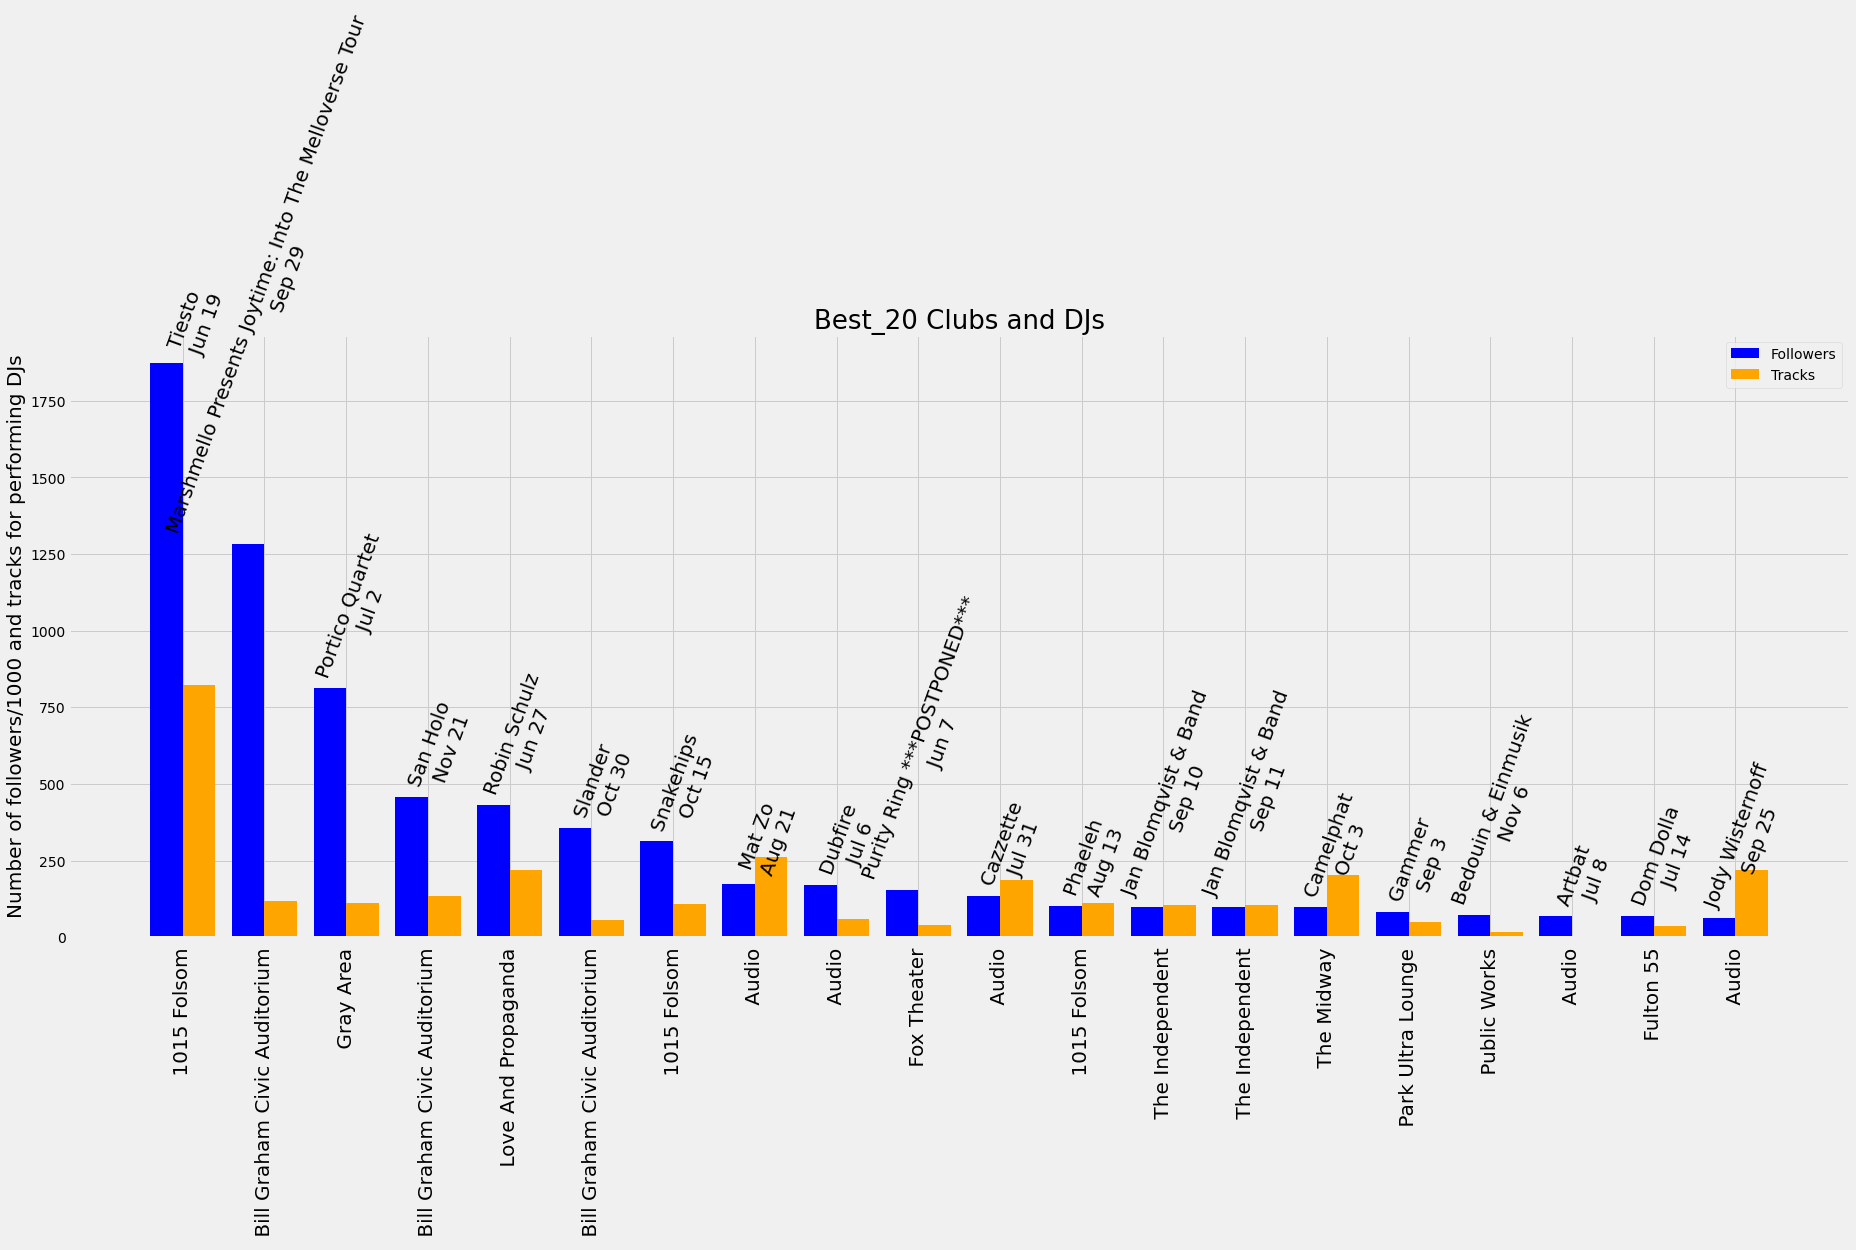

In [175]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig = plt.figure(figsize=(26,16))
ax = fig.add_subplot(111)

followers_vals = (current_top_20["Followers"])/1e3
rects1 = ax.bar(ind-width/2, followers_vals, width, color='blue')
tracks_vals = current_top_20["Tracks"]
rects2 = ax.bar(ind+width/2, tracks_vals, width, color='orange')

ax.set_title('Best_20 Clubs and DJs', fontsize=26)
ax.set_ylabel('Number of followers/1000 and tracks for performing DJs', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( (current_top_20["Club"]), rotation=90, fontsize=20 )
ax.legend( (rects1[0], rects2[0]), ('Followers', 'Tracks') )

artists = current_top_20["Artist"]
dates = current_top_20["Date"]

# Make some labels.
labels1 = artists
labels2 = dates
labels = labels1 + "\n" +labels2

def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 0.7, height + 2, label,
                ha='center', va='bottom', rotation=70, fontsize=20)

autolabel(rects1, labels)
#autolabel(rects2, labels2)

plt.tight_layout()

fig_name = "hot_clubs"
plt.savefig(f"output/{fig_name}.png")


In [176]:
zoom_f = 3
current_top_20_zoomed = current_venue_out.iloc[zoom_f:20+zoom_f, :]
current_top_20_zoomed


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134
4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218
5,Slander,https://www.facebook.com/events/529721134066176/,Bill Graham Civic Auditorium,San Francisco,Oct 30,8pm,357656,58
6,Snakehips,https://www.facebook.com/events/529721134066176/,1015 Folsom,San Francisco,Oct 15,9pm-2am,312615,110
7,Mat Zo,https://www.eventbrite.com/e/mat-zo-tickets-92...,Audio,San Francisco,Aug 21,9:30pm-2:30am,175095,262
8,Dubfire,https://www.facebook.com/wishbarsf/,Audio,San Francisco,Jul 6,9:30pm-2am,172041,59
9,Purity Ring ***POSTPONED***,https://www1.ticketmaster.com/event/1C00584DD8...,Fox Theater,Oakland,Jun 7,7:30pm,154168,40
10,Cazzette,https://www.residentadvisor.net/events/1373836,Audio,San Francisco,Jul 31,9:30pm-2am,135704,188
11,Phaeleh,https://www.eventbrite.com/e/phantoms-dj-set-t...,1015 Folsom,San Francisco,Aug 13,8pm-11:30pm,100913,111
12,Jan Blomqvist & Band,https://www.ticketweb.com/event/jan-blomqvist-...,The Independent,San Francisco,Sep 10,9pm,99714,106


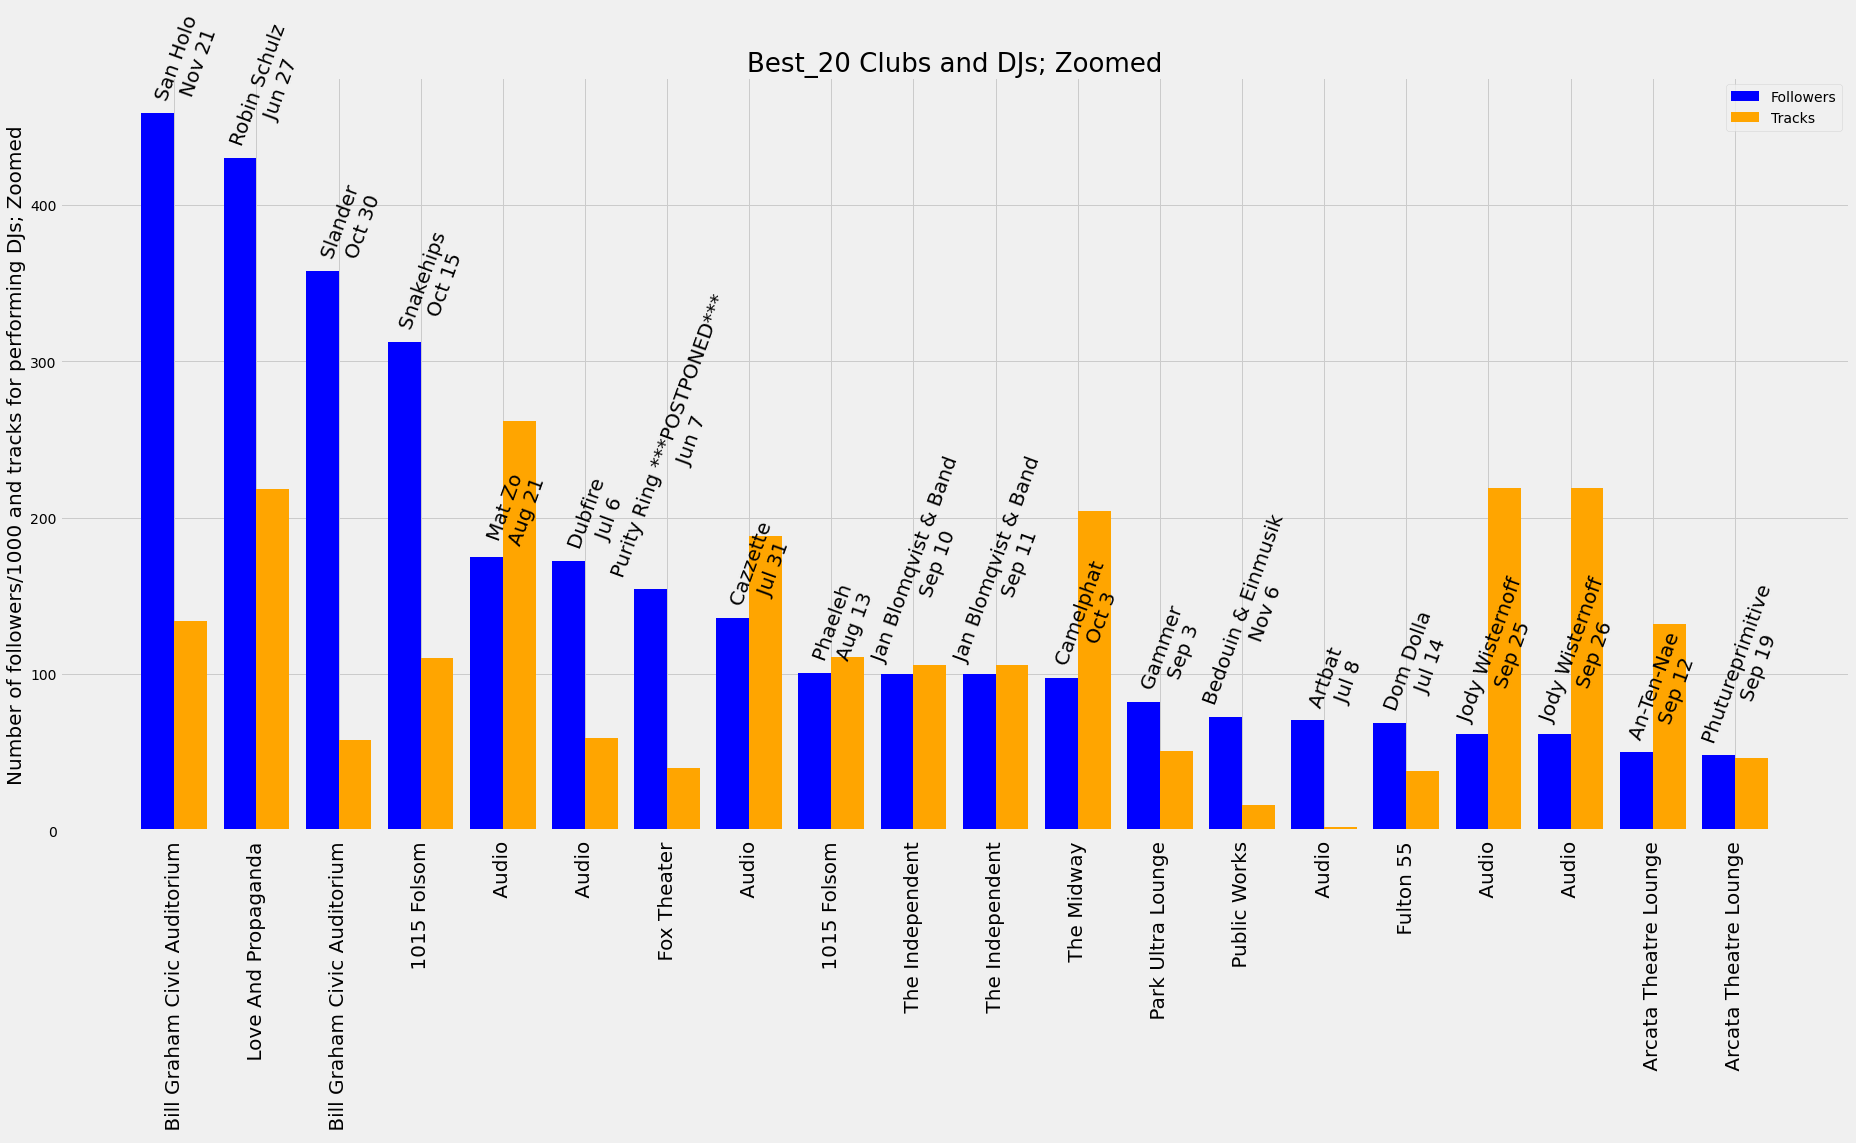

In [177]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

N = 20
ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig = plt.figure(figsize=(26,16))
ax = fig.add_subplot(111)

followers_vals = (current_top_20_zoomed["Followers"])/1e3
rects1 = ax.bar(ind-width/2, followers_vals, width, color='blue')
tracks_vals = current_top_20_zoomed["Tracks"]
rects2 = ax.bar(ind+width/2, tracks_vals, width, color='orange')

ax.set_title('Best_20 Clubs and DJs; Zoomed', fontsize=26)
ax.set_ylabel('Number of followers/1000 and tracks for performing DJs; Zoomed', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels( (current_top_20_zoomed["Club"]), rotation=90, fontsize=20 )
ax.legend( (rects1[0], rects2[0]), ('Followers', 'Tracks') )

artists = current_top_20_zoomed["Artist"]
dates = current_top_20_zoomed["Date"]

# Make some labels.
labels1 = artists
labels2 = dates
labels = labels1 + "\n" +labels2

def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 0.7, height + 2, label,
                ha='center', va='bottom', rotation=70, fontsize=20)

autolabel(rects1, labels)
#autolabel(rects2, labels2)

plt.tight_layout()

fig_name = "hot_clubs_zoomed"
plt.savefig(f"output/{fig_name}.png")


In [178]:
current_venue_out.tail()


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
104,Rescheduled: Sequence 08.28: Spag Heddy & Effin,https://www.eventbrite.com/e/rescheduled-seque...,DNA Lounge,San Francisco,Aug 28,9pm-3am,0,0
105,Gammer - Rescheduled,https://www.eventbrite.com/e/gammer-reschedule...,Park Ultra Lounge,Sacramento,Sep 3,9pm-2am,0,0
106,Sequence: Arius,https://www.facebook.com/events/529721134066176/,DNA Lounge,San Francisco,Sep 3,9pm-2am,0,0
107,44 To The Floor,https://www.facebook.com/events/1284743545054583/,Lvl 44,San Jose,Jul 1,10pm-2am,0,0
108,Club Necromancy - 3 Year Anniversary,https://www.twitch/tv/djkeyz2020,Livestream,Online,Jun 20,8am-1am,0,0


In [179]:
current_venue_nz = current_venue_out.loc[(current_venue_out["Followers"]!=0)]
current_venue_nz = current_venue_nz.reset_index(drop=True)
current_venue_nz.tail()


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks
47,Kraftwerk 3-D,https://www.ticketmaster.com/event/1C0058540DB...,Bill Graham Civic Auditorium,San Francisco,Jun 23,8pm-10pm,1492,11308577
48,Pizza and Techno,https://www.eventbrite.com/e/pizza-and-techno-...,Audio Nightclub,San Francisco,Aug 1,1pm-8pm,661,40
49,Patch Pulse: Xyla & Somni,https://grayarea.org/event/patch-pulse-xyla-so...,Livestream,Online,Jun 12,8pm-10pm,84,90
50,"Goodie Mob: Cee-Lo Green, Big Gipp, Khujo & T-Mo",https://www.facebook.com/events/142074986458785/,The New Parish,Oakland,Sep 27,9pm-11:30pm,41,7
51,Green Goddess 3,https://www.facebook.com/events/142074986458785/,TBA,Sacramento,Jun 5-Sun: Jun 7,Fri: 3pm-Sun: 6pm,8,2322966


In [180]:
len(current_venue_nz)


52

In [181]:
dates = current_venue_nz["Date"].replace(" ","")
months_spl = []
months = []

for i in range(len(dates)):
    months_spl.append(dates[i].split(" "))
    months.append(str(months_spl[i][1]))

months[0]


'Jun'

In [182]:
type(months[0])


str

In [183]:
current_venue_nz["Month"]=months
current_venue_nz.head()


,Artist,Event_link,Club,City,Date,Time,Followers,Tracks,Month
0,Tiesto,https://www.facebook.com/theyreheresf/events/,1015 Folsom,San Francisco,Jun 19,10pm-3am,1872219,822,Jun
1,Marshmello Presents Joytime: Into The Mellover...,https://www.ticketmaster.com/marshmello-san-fr...,Bill Graham Civic Auditorium,San Francisco,Sep 29,7pm,1283407,118,Sep
2,Portico Quartet,https://grayarea.org/event/portico-quartet/,Gray Area,San Francisco,Jul 2,8pm-12am,813658,111,Jul
3,San Holo,https://www1.ticketmaster.com/san-holo-san-fra...,Bill Graham Civic Auditorium,San Francisco,Nov 21,8pm,458600,134,Nov
4,Robin Schulz,https://www.facebook.com/events/982206848587416/,Love And Propaganda,San Francisco,Jun 27,9:30pm-2am,430137,218,Jun


In [184]:
current_venue_nz.to_csv("output/venue_found.csv")


In [185]:
from sqlalchemy import create_engine


In [188]:
conn = "XXXX:YYYY@localhost:54XX/house_cloud"
engine = create_engine(f'postgresql://{conn}')


In [190]:
engine.table_names()



['venue_found']

In [191]:
current_venue_nz.to_sql(name='venue_found_1', con=engine, if_exists='append', index=True)


In [192]:
engine.table_names()


['venue_found', 'venue_found_1']

In [193]:
current_venue_nz['Month'].value_counts()


Sep    12
Jun    11
Jul    10
Oct     9
Aug     6
Nov     3
Dec     1
Name: Month, dtype: int64

In [194]:
venue_found = pd.read_sql_query('select * from venue_found_1', con=engine)



In [195]:
artists = {}
for i in range(len(venue_found.Artist)):
    artists.update( {venue_found.Artist[i]: [venue_found.Club[i], venue_found.Followers[i],\
                                                venue_found.Tracks[i], venue_found.Date[i], \
                                                venue_found.Time[i], venue_found.Event_link[i]]} )
artists                                                 

{'Tiesto ': [' 1015 Folsom ',
  1872219,
  822,
  ' Jun 19 ',
  '10pm-3am',
  'https://www.facebook.com/theyreheresf/events/'],
 'Marshmello Presents Joytime: Into The Melloverse Tour ': [' Bill Graham Civic Auditorium ',
  1283407,
  118,
  ' Sep 29 ',
  '7pm',
  'https://www.ticketmaster.com/marshmello-san-francisco-california-09-29-2020/event/1C005859FB169E62'],
 'Portico Quartet ': [' Gray Area ',
  813658,
  111,
  ' Jul 2 ',
  '8pm-12am',
  'https://grayarea.org/event/portico-quartet/'],
 'San Holo ': [' Bill Graham Civic Auditorium ',
  458600,
  134,
  ' Nov 21 ',
  '8pm',
  'https://www1.ticketmaster.com/san-holo-san-francisco-california-03-21-2020/event/1C00582AF8B9893D'],
 'Robin Schulz ': [' Love And Propaganda ',
  430137,
  218,
  ' Jun 27 ',
  '9:30pm-2am',
  'https://www.facebook.com/events/982206848587416/'],
 'Slander ': [' Bill Graham Civic Auditorium ',
  357656,
  58,
  ' Oct 30 ',
  '8pm',
  'https://www.facebook.com/events/529721134066176/'],
 'Snakehips ': [' 10

In [196]:
type(artists)


dict

In [197]:
#artists.values()
for artist in artists:
    print (artist, artists[artist])
    print("--"*30)

Tiesto  [' 1015 Folsom ', 1872219, 822, ' Jun 19 ', '10pm-3am', 'https://www.facebook.com/theyreheresf/events/']
------------------------------------------------------------
Marshmello Presents Joytime: Into The Melloverse Tour  [' Bill Graham Civic Auditorium ', 1283407, 118, ' Sep 29 ', '7pm', 'https://www.ticketmaster.com/marshmello-san-francisco-california-09-29-2020/event/1C005859FB169E62']
------------------------------------------------------------
Portico Quartet  [' Gray Area ', 813658, 111, ' Jul 2 ', '8pm-12am', 'https://grayarea.org/event/portico-quartet/']
------------------------------------------------------------
San Holo  [' Bill Graham Civic Auditorium ', 458600, 134, ' Nov 21 ', '8pm', 'https://www1.ticketmaster.com/san-holo-san-francisco-california-03-21-2020/event/1C00582AF8B9893D']
------------------------------------------------------------
Robin Schulz  [' Love And Propaganda ', 430137, 218, ' Jun 27 ', '9:30pm-2am', 'https://www.facebook.com/events/982206848587

In [199]:
jun_venue = pd.read_sql_query('select * from jun_venue', con=engine)
jun_venue 


,Date,Artist,Club,City,Time,Event_link,Followers,Tracks
0,Jun 19,Tiesto,1015 Folsom,San Francisco,10pm-3am,https://www.facebook.com/theyreheresf/events/,1872219,822
1,Jun 27,Robin Schulz,Love And Propaganda,San Francisco,9:30pm-2am,https://www.facebook.com/events/982206848587416/,430137,218
2,Jun 7,Purity Ring ***POSTPONED***,Fox Theater,Oakland,7:30pm,https://www1.ticketmaster.com/event/1C00584DD8...,154168,40
3,Jun 26,Dosem,Audio,San Francisco,9:30pm-2am,https://www.eventbrite.com/e/dosem-tickets-967...,42570,169
4,Jun 18,Meduza,1015 Folsom,San Francisco,9pm-1am,https://www.eventbrite.com/e/meduza-at-1015-fo...,27137,22
5,Jun 27,J. Worra,Audio,San Francisco,9:30pm-2am,https://www.eventbrite.com/e/j-worra-tickets-9...,10407,27
6,Jun 7,David Harness,Lost & Found,Oakland,2pm-9pm,https://www.facebook.com/events/450309985901970/,6013,40
7,Jun 7,Resonant Frequencies 028,Livestream,Online,6pm-10pm,https://www.eventbrite.com/e/rescheduled-seque...,1615,37
8,Jun 23,Kraftwerk 3-D,Bill Graham Civic Auditorium,San Francisco,8pm-10pm,https://www.ticketmaster.com/event/1C0058540DB...,1492,11308577
9,Jun 12,Patch Pulse: Xyla & Somni,Livestream,Online,8pm-10pm,https://grayarea.org/event/patch-pulse-xyla-so...,84,90


In [200]:
jul_venue = pd.read_sql_query('select * from jul_venue', con=engine)
jul_venue.head()


,Date,Artist,Club,City,Time,Event_link,Followers,Tracks
0,Jul 2,Portico Quartet,Gray Area,San Francisco,8pm-12am,https://grayarea.org/event/portico-quartet/,813658,111
1,Jul 6,Dubfire,Audio,San Francisco,9:30pm-2am,https://www.facebook.com/wishbarsf/,172041,59
2,Jul 31,Cazzette,Audio,San Francisco,9:30pm-2am,https://www.residentadvisor.net/events/1373836,135704,188
3,Jul 8,Artbat,Audio,San Francisco,9:30pm-2am,https://www.eventbrite.com/e/artbat-tickets-98...,70736,2
4,Jul 14,Dom Dolla,Fulton 55,Fresno,9pm-2am,https://bit.ly/DomDollaFresno,68616,38


In [201]:
jan_venue = pd.read_sql_query('select * from jan_venue', con=engine)
jan_venue


,Date,Artist,Club,City,Time,Followers,Tracks
